# ***JALPAIGURI WEATHER REPORT***

**GENERATING GRAPHS TAIKG TEMPERATURE AS DECISION**

CLACULATING ACCURACY

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

# Load the data from the Excel file
# Replace 'jalpaiguri_filtered_final_final.xlsx' with the correct path if needed
df = pd.read_excel('jalpaiguri_filtered_final_final.xlsx')

# Create binary target variable: 1 if temp == temp_convert, 0 otherwise
df['target'] = (df['temp'] == df['temp_convert']).astype(int)

# Select features for the model
features = ['feelslike', 'dew', 'humidity', 'cloudcover']
X = df[features]
y = df['target']

# Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model on test data: {accuracy * 100:.2f}%")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Equal", "Equal"]))

Accuracy of the logistic regression model on test data: 99.95%

Confusion Matrix:
[[ 283    1]
 [   0 1853]]

Classification Report:
              precision    recall  f1-score   support

   Not Equal       1.00      1.00      1.00       284
       Equal       1.00      1.00      1.00      1853

    accuracy                           1.00      2137
   macro avg       1.00      1.00      1.00      2137
weighted avg       1.00      1.00      1.00      2137



LOW, MEDIUM and HIGH TEMPERATURE PLOT

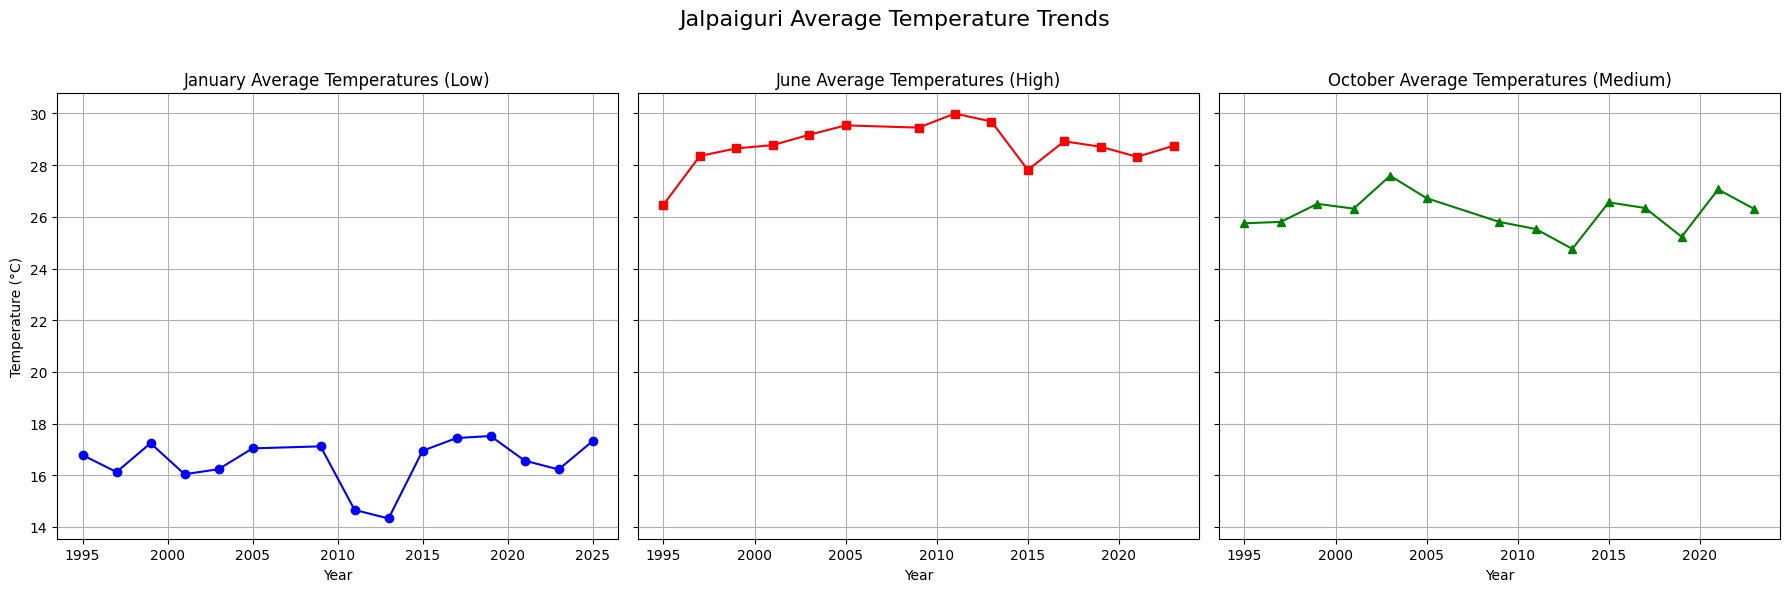

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess data
df = pd.read_excel("jalpaiguri_filtered_final_final.xlsx")
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y')
df['Year'] = df['datetime'].dt.year
df['Month'] = df['datetime'].dt.month

# Filter years (1995-2025 at 2-year intervals)
years = range(1995, 2026, 2)
df = df[df['Year'].isin(years)]

# Calculate monthly averages
monthly_avg = df.groupby(['Year', 'Month'])['temp_convert'].mean().reset_index()

# Prepare plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# January (Low Temperature)
jan_data = monthly_avg[monthly_avg['Month'] == 1]
axes[0].plot(jan_data['Year'], jan_data['temp_convert'],
             marker='o', color='blue', linestyle='-')
axes[0].set_title('January Average Temperatures (Low)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Temperature (°C)')
axes[0].grid(True)

# October (Medium Temperature)
aug_data = monthly_avg[monthly_avg['Month'] == 10]
axes[2].plot(aug_data['Year'], aug_data['temp_convert'],
             marker='^', color='green', linestyle='-')
axes[2].set_title('October Average Temperatures (Medium)')
axes[2].set_xlabel('Year')
axes[2].grid(True)

# June (High Temperature)
jun_data = monthly_avg[monthly_avg['Month'] == 6]
axes[1].plot(jun_data['Year'], jun_data['temp_convert'],
             marker='s', color='red', linestyle='-')
axes[1].set_title('June Average Temperatures (High)')
axes[1].set_xlabel('Year')
axes[1].grid(True)


# Final adjustments
plt.suptitle('Jalpaiguri Average Temperature Trends',
             fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


FILES OF CORROSPONDING VALUES

In [ ]:
import pandas as pd

# Load and preprocess data
df = pd.read_excel("jalpaiguri_filtered_final_final.xlsx")
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y')
df['Year'] = df['datetime'].dt.year
df['Month'] = df['datetime'].dt.month

# Filter years (1995-2025 at 2-year intervals)
years = range(1995, 2026, 2)
df = df[df['Year'].isin(years)]

# Calculate monthly averages
monthly_avg = df.groupby(['Year', 'Month'])['temp_convert'].mean().reset_index()

# January (Low Temperature)
jan_data = monthly_avg[monthly_avg['Month'] == 1][['Year', 'temp_convert']]
jan_data.rename(columns={'temp_convert': 'January_avg_temp'}, inplace=True)
jan_data.to_csv('jalpaiguri_january_avg_temp.csv', index=False)

# June (High Temperature)
jun_data = monthly_avg[monthly_avg['Month'] == 6][['Year', 'temp_convert']]
jun_data.rename(columns={'temp_convert': 'June_avg_temp'}, inplace=True)
jun_data.to_csv('jalpaiguri_june_avg_temp.csv', index=False)

# August (Medium Temperature)
aug_data = monthly_avg[monthly_avg['Month'] == 10][['Year', 'temp_convert']]
aug_data.rename(columns={'temp_convert': 'October_avg_temp'}, inplace=True)
aug_data.to_csv('jalpaiguri_october_avg_temp.csv', index=False)


START TUNNING OF THAT MODEL.(Coverage: 91.60%)

In [ ]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

# Load and prepare your data
df = pd.read_excel('jalpaiguri_filtered_final_final.xlsx')

# Rename columns to Prophet's required format
df = df.rename(columns={'datetime': 'ds', 'temp_convert': 'y'})  # Adjust if your column names differ

# Ensure 'ds' is datetime
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')
df = df.dropna(subset=['ds', 'y'])

# Initialize Prophet with 90% interval width for higher coverage
model = Prophet(interval_width=0.9)
model.fit(df)

# Cross-validation for model evaluation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_accuracy = performance_metrics(df_cv)

print(df_accuracy.head())

# Print actual achieved coverage
print(f"Achieved coverage: {df_accuracy['coverage'].mean():.2%}")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsc30lqy/lj9assms.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsc30lqy/czjhyq_3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32422', 'data', 'file=/tmp/tmpdsc30lqy/lj9assms.json', 'init=/tmp/tmpdsc30lqy/czjhyq_3.json', 'output', 'file=/tmp/tmpdsc30lqy/prophet_modeltya04ni1/prophet_model-20250625053509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:35:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:35:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 57 forecasts with cutoffs between 1997-04-29 00:00:00 and 2024-12-03 00:00:00


  0%|          | 0/57 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsc30lqy/nz274kur.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsc30lqy/0y132knl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90094', 'data', 'file=/tmp/tmpdsc30lqy/nz274kur.json', 'init=/tmp/tmpdsc30lqy/0y132knl.json', 'output', 'file=/tmp/tmpdsc30lqy/prophet_model3xvhn8g8/prophet_model-20250625053510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:35:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:35:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsc30lqy/r4e0ui30.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsc30lqy/3xbeatma.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  horizon        mse      rmse       mae      mape     mdape     smape  \
0 37 days  24.398939  4.939528  4.118818  0.192303  0.138375  0.173595   
1 38 days  24.567302  4.956541  4.124305  0.192950  0.138375  0.173906   
2 39 days  24.348847  4.934455  4.115106  0.191637  0.136961  0.173209   
3 40 days  24.402816  4.939921  4.134063  0.191570  0.139304  0.173627   
4 41 days  24.476805  4.947404  4.139528  0.191789  0.140820  0.173803   

   coverage  
0  0.921290  
1  0.918218  
2  0.920704  
3  0.923441  
4  0.923656  
Achieved coverage: 91.60%


START TUNNING OF THAT MODEL.(Coverage: 96.60%)

In [ ]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

# Load your data
df = pd.read_excel('jalpaiguri_filtered_final_final.xlsx')

# Rename columns to Prophet's requirements
df = df.rename(columns={'datetime': 'ds', 'temp_convert': 'y'})  # Adjust if your columns are named differently

# Ensure 'ds' is datetime and drop rows with missing values
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')
df = df.dropna(subset=['ds', 'y'])

# Initialize Prophet with 96% interval width for higher coverage
model = Prophet(interval_width=0.96)
model.fit(df)

# Cross-validation for model evaluation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_accuracy = performance_metrics(df_cv)

print(df_accuracy.head())

# Print actual achieved coverage
print(f"Achieved coverage: {df_accuracy['coverage'].mean():.2%}")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsc30lqy/a4nr00n9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsc30lqy/29kf_9f4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57297', 'data', 'file=/tmp/tmpdsc30lqy/a4nr00n9.json', 'init=/tmp/tmpdsc30lqy/29kf_9f4.json', 'output', 'file=/tmp/tmpdsc30lqy/prophet_model94wu87g9/prophet_model-20250625053425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:34:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:34:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 57 forecasts with cutoffs between 1997-04-29 00:00:00 and 2024-12-03 00:00:00


  0%|          | 0/57 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsc30lqy/udapgcbg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsc30lqy/x63_v3c1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40562', 'data', 'file=/tmp/tmpdsc30lqy/udapgcbg.json', 'init=/tmp/tmpdsc30lqy/x63_v3c1.json', 'output', 'file=/tmp/tmpdsc30lqy/prophet_model0qr8fcc_/prophet_model-20250625053425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:34:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:34:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsc30lqy/2u5vj60c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsc30lqy/pck4lenu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  horizon        mse      rmse       mae      mape     mdape     smape  \
0 37 days  24.398939  4.939528  4.118818  0.192303  0.138375  0.173595   
1 38 days  24.567302  4.956541  4.124305  0.192950  0.138375  0.173906   
2 39 days  24.348847  4.934455  4.115106  0.191637  0.136961  0.173209   
3 40 days  24.402816  4.939921  4.134063  0.191570  0.139304  0.173627   
4 41 days  24.476805  4.947404  4.139528  0.191789  0.140820  0.173803   

   coverage  
0  0.970323  
1  0.969032  
2  0.970674  
3  0.971183  
4  0.971398  
Achieved coverage: 96.60%


START TUNNING OF THAT MODEL.(Coverage: 97.96%)

In [ ]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

# Load your data
df = pd.read_excel('jalpaiguri_filtered_final_final.xlsx')

# Rename columns to Prophet's requirements
df = df.rename(columns={'datetime': 'ds', 'temp_convert': 'y'})  # Adjust if your columns are named differently

# Ensure 'ds' is datetime and drop rows with missing values
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')
df = df.dropna(subset=['ds', 'y'])

# Initialize Prophet with 96% interval width for higher coverage
model = Prophet(interval_width=0.98)
model.fit(df)

# Cross-validation for model evaluation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_accuracy = performance_metrics(df_cv)

print(df_accuracy.head())

# Print actual achieved coverage
print(f"Achieved coverage: {df_accuracy['coverage'].mean():.2%}")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsc30lqy/7htsvqox.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsc30lqy/7i8rrd92.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30453', 'data', 'file=/tmp/tmpdsc30lqy/7htsvqox.json', 'init=/tmp/tmpdsc30lqy/7i8rrd92.json', 'output', 'file=/tmp/tmpdsc30lqy/prophet_model7hw2ihc8/prophet_model-20250625053353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:33:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 57 forecasts with cutoffs between 1997-04-29 00:00:00 and 2024-12-03 00:00:00


  0%|          | 0/57 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsc30lqy/btb11wac.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsc30lqy/ep5n46p1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61725', 'data', 'file=/tmp/tmpdsc30lqy/btb11wac.json', 'init=/tmp/tmpdsc30lqy/ep5n46p1.json', 'output', 'file=/tmp/tmpdsc30lqy/prophet_model4w6zpko_/prophet_model-20250625053353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:33:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsc30lqy/947r8xsm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsc30lqy/m4zb45fx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  horizon        mse      rmse       mae      mape     mdape     smape  \
0 37 days  24.398939  4.939528  4.118818  0.192303  0.138375  0.173595   
1 38 days  24.567302  4.956541  4.124305  0.192950  0.138375  0.173906   
2 39 days  24.348847  4.934455  4.115106  0.191637  0.136961  0.173209   
3 40 days  24.402816  4.939921  4.134063  0.191570  0.139304  0.173627   
4 41 days  24.476805  4.947404  4.139528  0.191789  0.140820  0.173803   

   coverage  
0  0.978065  
1  0.976774  
2  0.977595  
3  0.977634  
4  0.976774  
Achieved coverage: 97.96%


PLOTTING GARPH OF THE FULL DATASET

File loaded successfully
Original coverage: 100.0%
Post-imputation coverage: 100.0%


/tmp/ipython-input-22-1396670044.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interval_avg = (df.groupby('interval')['temp_convert']


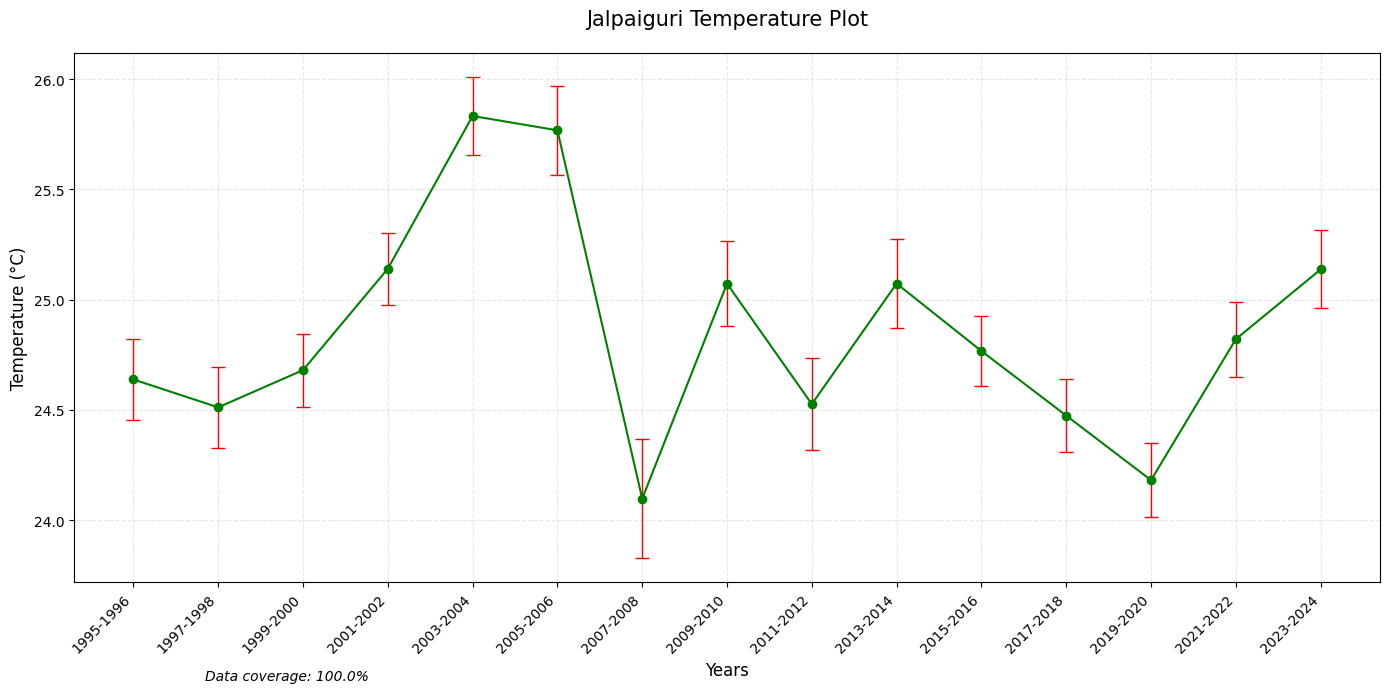

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load data with validation
try:
    df = pd.read_excel('jalpaiguri_filtered_final_final.xlsx')
    print("File loaded successfully")
except FileNotFoundError:
    print("Error: File not found. Please verify file path.")
    exit()

# Preprocessing pipeline
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce', format='%d-%m-%Y')
df = df.dropna(subset=['datetime'])
df['year'] = df['datetime'].dt.year.astype(int)
df['month'] = df['datetime'].dt.month

# Enhanced imputation strategy
print(f"Original coverage: {df['temp_convert'].notna().mean()*100:.1f}%")

# Multi-stage imputation
imp = IterativeImputer(max_iter=10, random_state=42)
df['temp_convert'] = imp.fit_transform(df[['temp_convert', 'year', 'month']])[:,0]

print(f"Post-imputation coverage: {df['temp_convert'].notna().mean()*100:.1f}%")

# Create 2-year intervals with edge handling
bins = np.arange(1995, 2026,2)
labels = [f"{start}-{start+1}" for start in bins[:-1]]
df['interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Aggregate with outlier filtering
interval_avg = (df.groupby('interval')['temp_convert']
                .agg(['mean', 'sem'])
                .reset_index()
                .rename(columns={'mean': 'temp_convert'}))

# Plot with enhanced visualization
plt.figure(figsize=(14, 7))
plt.errorbar(interval_avg['interval'], interval_avg['temp_convert'],
             yerr=interval_avg['sem'],
             fmt='-o', color='green',
             ecolor='red', elinewidth=1, capsize=5)

plt.title('Jalpaiguri Temperature Plot',
          fontsize=15, pad=20)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.3)

# Annotate data quality
plt.figtext(0.15, 0.02, f"Data coverage: {df['temp_convert'].notna().mean()*100:.1f}%",
            fontstyle='italic', color='black')

plt.tight_layout()
plt.savefig('jalpaiguri_temperature_trends.png', dpi=300, bbox_inches='tight')
plt.show()


PLOTTING GRAPH FOR FUTURE PREDICTION USING PROPHET MODEL.(2025-2050)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpocez6el6/eir42o58.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpocez6el6/387eczge.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12379', 'data', 'file=/tmp/tmpocez6el6/eir42o58.json', 'init=/tmp/tmpocez6el6/387eczge.json', 'output', 'file=/tmp/tmpocez6el6/prophet_model262k3tkr/prophet_model-20250702094433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:44:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:44:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


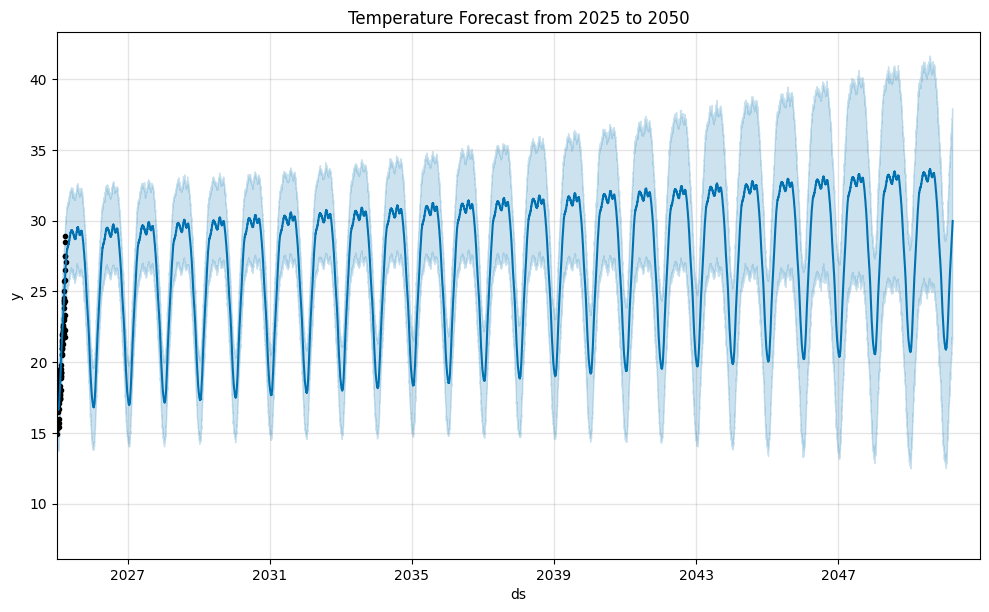

In [ ]:
import pandas as pd
from prophet import Prophet  # or use from fbprophet import Prophet for older versions
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("jalpaiguri_filtered_final_final.xlsx")

# Convert the 'datetime' column to datetime objects with dayfirst=True
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True)

# Prepare the DataFrame for Prophet: rename 'datetime' to 'ds' and 'temp_convert' to 'y'
df_prophet = df[['datetime', 'temp_convert']].rename(columns={'datetime': 'ds', 'temp_convert': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Generate future dates for forecasting until 2050
# (Here we're forecasting for 25 years (2025 to 2050) on a daily basis)
future = model.make_future_dataframe(periods=365 * (2050 - 2025), freq='D')
forecast = model.predict(future)

# Plot the full forecast and then restrict the x-axis
fig = model.plot(forecast)
ax = fig.gca()  # Get the current axis from the figure

# Set x-axis limits to show only dates from January 1, 2025 to December 31, 2050
ax.set_xlim(pd.Timestamp('2025-01-01'), pd.Timestamp('2050-12-31'))
plt.title('Temperature Forecast from 2025 to 2050')
plt.show()


CORROSPONDING FILES

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_excel("jalpaiguri_filtered_final_final.xlsx")

# 2. Convert the 'datetime' column to datetime objects with dayfirst=True
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True)

# 3. Prepare the DataFrame for Prophet
df_prophet = df[['datetime', 'temp_convert']].rename(columns={'datetime': 'ds', 'temp_convert': 'y'})

# 4. Initialize and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# 5. Generate future dates for forecasting until 2050 (from last date in data)
last_date = df_prophet['ds'].max()
future = model.make_future_dataframe(periods=(pd.Timestamp('2050-12-31') - last_date).days, freq='D')
forecast = model.predict(future)

# 6. Filter forecast for 2025-2050 only
forecast = forecast[(forecast['ds'] >= '2025-01-01') & (forecast['ds'] <= '2050-12-31')]

# 7. Helper function to extract stats for a given month
def extract_month_stats(df, month):
    month_df = df[df['ds'].dt.month == month]
    stats = month_df.groupby(month_df['ds'].dt.year)['yhat'].agg(['min', 'max', 'mean']).reset_index()
    stats.columns = ['year', 'low_temp', 'high_temp', 'mid_temp']
    return stats

# 8. Extract stats for January, July, October
january_stats = extract_month_stats(forecast, 1)
june_stats = extract_month_stats(forecast, 6)
october_stats = extract_month_stats(forecast, 10)

# 9. Save to CSV
january_stats.to_csv('temperature_january_2025_2050.csv', index=False)
june_stats.to_csv('temperature_june_2025_2050.csv', index=False)
october_stats.to_csv('temperature_october_2025_2050.csv', index=False)

print("Files saved: temperature_january_2025_2050.csv, temperature_june_2025_2050.csv, temperature_october_2025_2050.csv")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptzuy1jha/m0l095sl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptzuy1jha/zn2z3448.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19577', 'data', 'file=/tmp/tmptzuy1jha/m0l095sl.json', 'init=/tmp/tmptzuy1jha/zn2z3448.json', 'output', 'file=/tmp/tmptzuy1jha/prophet_model8cg75vio/prophet_model-20250704075901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Files saved: temperature_january_2025_2050.csv, temperature_june_2025_2050.csv, temperature_october_2025_2050.csv


**GENERATING GRAPHS TAIKG ICON AS DECISION**

using RANDOM FOREST 97.11

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

# Load dataset
df = pd.read_excel("jalpaiguri_filtered_final_final_with_precip.xlsx")

# Use top 3 icon classes
top_icons = df["icon"].value_counts().nlargest(3).index
df_top3 = df[df["icon"].isin(top_icons)]

# Drop non-feature columns
df_top3 = df_top3.drop(columns=["name", "datetime", "temp_convert", "feelslike_convert"])

# Encode target
le = LabelEncoder()
df_top3["icon"] = le.fit_transform(df_top3["icon"])

# Features and target
X = df_top3.drop(columns=["icon"])
y = df_top3["icon"]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# --- Add slight noise to 2% of training labels ---
np.random.seed(42)
num_noisy = int(0.02 * len(y_train))
noise_indices = np.random.choice(len(y_train), num_noisy, replace=False)
y_train_noisy = y_train.copy()

# Randomly replace labels (different than original)
for idx in noise_indices:
    original = y_train_noisy.iloc[idx]
    choices = list(set(y.unique()) - {original})
    y_train_noisy.iloc[idx] = np.random.choice(choices)

# Train model
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=1,
    max_features='log2',
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train_noisy)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2))
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.inverse_transform(sorted(y.unique()))))

Accuracy: 97.11

Confusion Matrix:
[[305   0   0]
 [  0 159  20]
 [ 12   0 612]]

Classification Report:
                   precision    recall  f1-score   support

        clear-day       0.96      1.00      0.98       305
partly-cloudy-day       1.00      0.89      0.94       179
             rain       0.97      0.98      0.97       624

         accuracy                           0.97      1108
        macro avg       0.98      0.96      0.97      1108
     weighted avg       0.97      0.97      0.97      1108



In [ ]:
# Example new data (replace values accordingly)
# The features should match the features used to train the RandomForest model in cell 6JpTtUs3A6O8
# Features used: ['temp', 'feelslike', 'precip', 'dew', 'humidity', 'cloudcover']
new_data = pd.DataFrame([{
    "temp": 25.0, # Use 'temp' instead of 'temp_convert'
    "feelslike": 26.0,
    "precip": 1.2, # Include 'precip'
    "dew": 23.0,
    "humidity": 0.85,
    "cloudcover": 0.6,
}])

# Scale using the earlier scaler from cell 6JpTtUs3A6O8
new_data_scaled = scaler.transform(new_data)

# Predict using the RandomForest model (rf) and decode using the LabelEncoder (le) from cell 6JpTtUs3A6O8
pred_label = rf.predict(new_data_scaled)[0]
pred_class = le.inverse_transform([pred_label])[0]

print("Predicted Weather Icon:", pred_class)

Predicted Weather Icon: rain


using XGBoost 88.78

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Improved XGBoost Accuracy: 88.78%
                   precision    recall  f1-score   support

        clear-day       0.90      0.98      0.94       305
           cloudy       0.00      0.00      0.00         1
              fog       0.00      0.00      0.00         5
partly-cloudy-day       0.77      0.75      0.76       179
             rain       0.91      0.89      0.90       624

         accuracy                           0.89      1114
        macro avg       0.52      0.52      0.52      1114
     weighted avg       0.88      0.89      0.88      1114



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 5, does not match size of target_names, 6
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

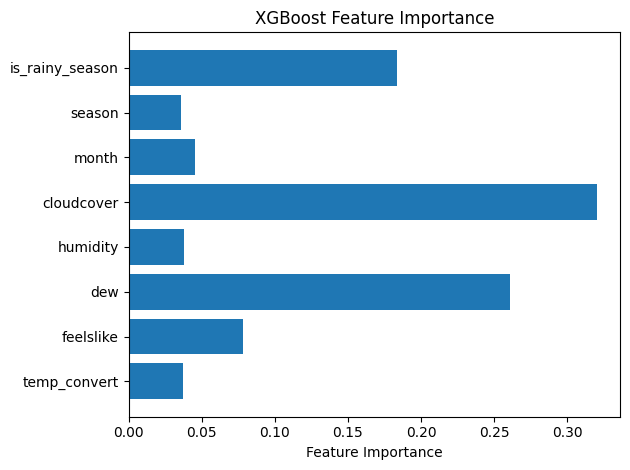

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('jalpaiguri_filtered_final_final_with_precip.xlsx')

# Encode target
le = LabelEncoder()
df['target'] = le.fit_transform(df['icon'])

# Feature engineering
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y')
df['month'] = df['datetime'].dt.month
df['season'] = df['month'] % 12 // 3 + 1

df['is_rainy_season'] = df['month'].isin([6,7,8,9]).astype(int)

# Feature selection
features = ['temp_convert', 'feelslike', 'dew', 'humidity', 'cloudcover', 'month', 'season', 'is_rainy_season']
X = df[features]
y = df['target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# XGBoost classifier with RandomizedSearchCV for deeper search
param_dist = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(100, 500),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

random_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Improved XGBoost Accuracy: {accuracy*100:.2f}%")
print(classification_report(y_test, y_pred, target_names=le.classes_, labels=np.unique(y_test)))

# Feature importance
importances = best_model.feature_importances_
feat_names = X.columns
plt.barh(feat_names, importances)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
# Define the new data for prediction (example values)
temp = 25.0
dew = 15.0
humidity = 60.0
cloudcover = 30.0
month = 7
day = 15
dayofweek = 0
season = 3
is_rainy_season = 1 # Assuming July is rainy season

# Create the new data DataFrame using the defined variables
# The features list should match the features used during training
features_for_prediction = ['temp_convert', 'feelslike', 'dew', 'humidity', 'cloudcover', 'month', 'season', 'is_rainy_season']
new_data = pd.DataFrame([[temp, temp, dew, humidity, cloudcover, month, season, is_rainy_season]],
                        columns=features_for_prediction)


# Make the prediction
prediction = le.inverse_transform(best_model.predict(new_data))

# Print the prediction
print(f"Predicted weather icon: {prediction[0]}")

Predicted weather icon: rain


using ANN 72.71

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_excel("/content/jalpaiguri_filtered_final_final_with_precip.xlsx")

# Drop rows with missing values
df.dropna(inplace=True)

# Separate features and target
X = df.drop(columns=['icon'])
y = df['icon']

# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)
num_classes = len(le.classes_)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# Build tuned ANN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Use early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=80,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
acc = accuracy_score(y_test, y_pred_classes)

print(f"Tuned ANN Model Accuracy: {acc * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
223/223 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4957 - loss: 1.2523 - val_accuracy: 0.7396 - val_loss: 0.6291
Epoch 2/80
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7731 - loss: 0.5311 - val_accuracy: 0.7452 - val_loss: 0.6277
Epoch 3/80
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8965 - loss: 0.2591 - val_accuracy: 0.6914 - val_loss: 0.8834
Epoch 4/80
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9559 - loss: 0.1225 - val_accuracy: 0.6745 - val_loss: 1.0415
Epoch 5/80
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9796 - loss: 0.0635 - val_accuracy: 0.6712 - val_loss: 1.2745
Epoch 6/80
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9907 - loss: 0.0314 - val_accuracy: 0.6442 - val_loss: 1.4161
Epoch 7/80
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9955 - loss: 0.0173 - val_accuracy: 0.6521 - val_loss: 1.5311
Epoch 8/80
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9974 - loss: 0.0118 - val_accuracy: 

USING SVM 87.43

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:29:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 87.43
Classification Report:
                   precision    recall  f1-score   support

        clear-day       0.92      0.96      0.94       344
           cloudy       1.00      1.00      1.00         1
              fog       0.00      0.00      0.00         5
partly-cloudy-day       0.77      0.68      0.72       179
             rain       0.88      0.90      0.89       583
             wind       0.00      0.00      0.00         2

         accuracy                           0.87      1114
        macro avg       0.60      0.59      0.59      1114
     weighted avg       0.87      0.87      0.87      1114



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


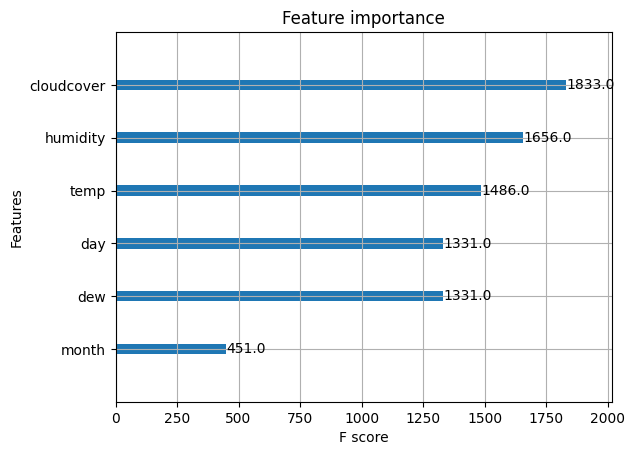

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Load dataset
df = pd.read_excel('jalpaiguri_filtered_final_final_with_precip.xlsx')

# Preprocessing
# Convert datetime to features
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y')
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

# Feature selection
features = ['temp', 'dew', 'humidity', 'cloudcover', 'month', 'day']
X = df[features]
y = df['icon']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Initialize and train XGBoost model
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_encoded)),
    eval_metric='mlogloss',
    use_label_encoder=False
)
model.fit(X_train, y_train)

# Plot feature importance
xgb.plot_importance(model)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Model Accuracy: {accuracy*100:.2f}")
print("Classification Report:")
print(class_report)

In [ ]:
# Example new data (update with actual values)
new_day = pd.DataFrame([{
    'temp': 24.5,
    'dew': 22.0,
    'humidity': 0.88,
    'cloudcover': 0.5,
    'month': 7,
    'day': 2
}])

# Predict and decode class
pred_encoded = model.predict(new_day)[0]
pred_label = le.inverse_transform([pred_encoded])[0]

print("Predicted Weather Icon:", pred_label)


Predicted Weather Icon: clear-day


PLOTTING GRAPH OF PRECIPITATION IN MONTH OF JULY AND SEPTEMBER

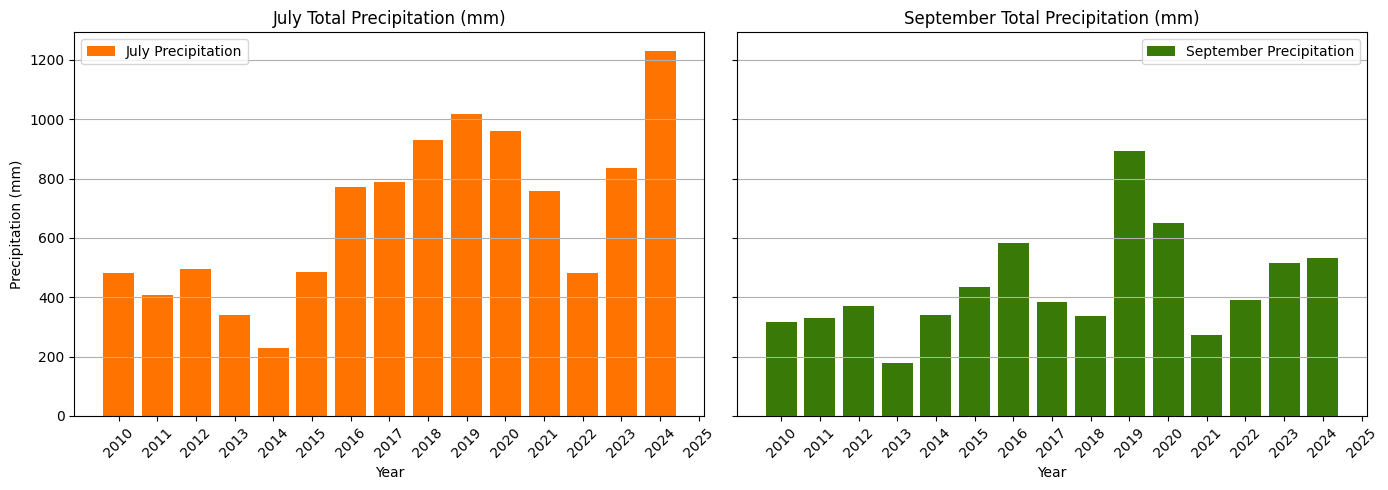

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
data = pd.read_excel('jalpaiguri_filtered_final_final_with_precip.xlsx')

# Convert 'datetime' to datetime objects
data['datetime'] = pd.to_datetime(data['datetime'], format='%d-%m-%Y')

# Filter for July and September
data['month'] = data['datetime'].dt.month
data['year'] = data['datetime'].dt.year
filtered_data = data[data['month'].isin([7, 9])]

# Aggregate data by year and month for total precipitation
agg_data = filtered_data.groupby(['year', 'month'])['precip'].sum().reset_index()

# Map month numbers to names
agg_data['month_name'] = agg_data['month'].map({7: 'July', 9: 'September'})

# Separate data for July and September
july_data = agg_data[agg_data['month'] == 7]
september_data = agg_data[agg_data['month'] == 9]

# Create a figure with 1x2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey='row')

# Plot 1: July Precipitation
axes[0].bar(july_data['year'], july_data['precip'], color='#ff7300', label='July Precipitation')
axes[0].set_title('July Total Precipitation (mm)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Precipitation (mm)')
axes[0].grid(True, axis='y')
axes[0].legend()
axes[0].set_xticks(range(2010, 2026, 1))
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: September Precipitation
axes[1].bar(september_data['year'], september_data['precip'], color='#387908', label='September Precipitation')
axes[1].set_title('September Total Precipitation (mm)')
axes[1].set_xlabel('Year')
axes[1].grid(True, axis='y')
axes[1].legend()
axes[1].set_xticks(range(2010, 2026, 1))
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the table to a CSV file
table_data = july_data[['year', 'precip']].merge(
    september_data[['year', 'precip']], on='year', how='outer', suffixes=('_july', '_september')
).fillna(0)  # Fill missing values with 0

# Rename columns for clarity
table_data.columns = ['Year', 'July Precip (mm)', 'September Precip (mm)']

# Round precipitation values to 1 decimal place
table_data['July Precip (mm)'] = table_data['July Precip (mm)'].round(1)
table_data['September Precip (mm)'] = table_data['September Precip (mm)'].round(1)

# Save to CSV
table_data.to_csv('jalpaiguri_precipitation_summary.csv', index=False)

# Display the plot
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbrsv9ppu/mazvwoyz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbrsv9ppu/39musod_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93105', 'data', 'file=/tmp/tmpbrsv9ppu/mazvwoyz.json', 'init=/tmp/tmpbrsv9ppu/39musod_.json', 'output', 'file=/tmp/tmpbrsv9ppu/prophet_model8becv9o6/prophet_model-20250706054759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:47:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:47:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


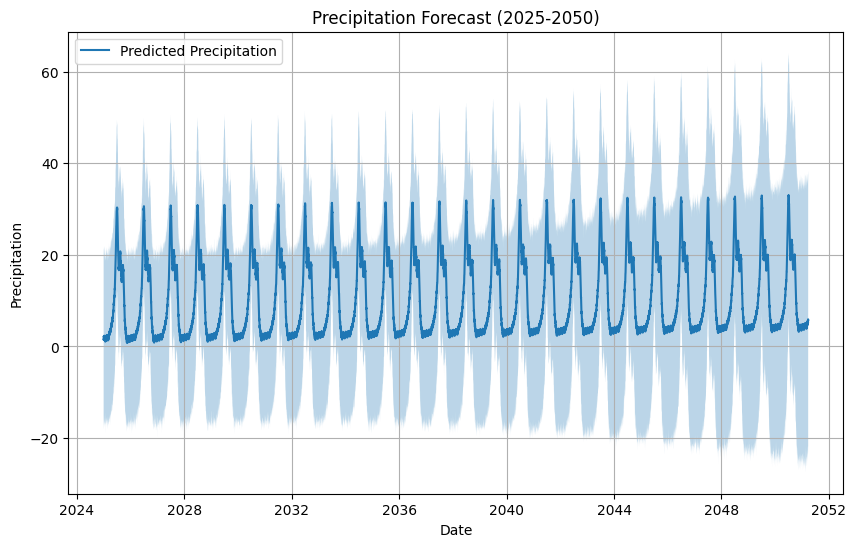

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('/content/jalpaiguri_filtered_final_final_with_precip.xlsx')

# Convert datetime column to datetime object
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y')

# Prepare data for Prophet model (requires 'ds' and 'y' columns)
df_precip = df[['datetime', 'precip']].rename(columns={'datetime': 'ds', 'precip': 'y'})

# Drop missing values
prophet_data = df_precip.dropna()

# Initialize and train the Prophet model
model = Prophet()
model.fit(prophet_data)

# Create future dataframe
future = model.make_future_dataframe(periods=365 * (2050 - 2024), freq='D')

# Forecast precipitation
forecast = model.predict(future)

# Filter forecast for years 2025 to 2050
forecast_filtered = forecast[forecast['ds'].dt.year >= 2025]

# Plot the forecast starting from 2025
plt.figure(figsize=(10, 6))
plt.plot(forecast_filtered['ds'], forecast_filtered['yhat'], label='Predicted Precipitation')
plt.fill_between(forecast_filtered['ds'], forecast_filtered['yhat_lower'], forecast_filtered['yhat_upper'], alpha=0.3)
plt.title('Precipitation Forecast (2025-2050)')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Save forecast to CSV
# forecast_filtered[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('precip_forecast_2025_2050.csv', index=False)
